In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report
from sklearn.metrics import classification_report, precision_recall_fscore_support
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import learning_curve
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix

In [2]:
data = pd.read_csv('dataset/heart.csv')
# data = pd.read_csv('dataset/heart2.csv')
print(data.head)
print(data.columns)  

<bound method NDFrame.head of      Age Sex ChestPainType  RestingBP  Cholesterol  FastingBS RestingECG  \
0     40   M           ATA      140.0        289.0          0     Normal   
1     49   F           NAP      160.0        180.0          0     Normal   
2     37   M           ATA      130.0        283.0          0         ST   
3     48   F           ASY      138.0        214.0          0     Normal   
4     54   M           NAP      150.0        195.0          0     Normal   
..   ...  ..           ...        ...          ...        ...        ...   
916   57   F           ATA      130.0        236.0          0        LVH   
917   38   M           NAP      138.0        175.0          0     Normal   
918   52   M            TA      145.0        155.0          1         ST   
919   52   M            TA      143.0        168.0          1         ST   
920   51   M           ASY      112.0         13.0          1         ST   

     MaxHR ExerciseAngina  Oldpeak ST_Slope  HeartDisease

In [3]:
for column in data.columns:
    if data[column].dtype == 'object':
        print(column, data[column].unique())

Sex ['M' 'F']
ChestPainType ['ATA' 'NAP' 'ASY' 'TA']
RestingECG ['Normal' 'ST' 'LVH']
ExerciseAngina ['N' 'Y']
ST_Slope ['Up' 'Flat' 'Down' nan]


In [4]:
stats = data.describe()
print(stats)

              Age   RestingBP  Cholesterol   FastingBS       MaxHR  \
count  921.000000  921.000000   921.000000  921.000000  921.000000   
mean    53.504886  132.399566   198.516830    0.235613  136.821933   
std      9.417850   18.504141   109.391201    0.424612   25.431981   
min     28.000000    0.000000     0.000000    0.000000   60.000000   
25%     47.000000  120.000000   172.000000    0.000000  120.000000   
50%     54.000000  130.000000   222.000000    0.000000  138.000000   
75%     60.000000  140.000000   267.000000    0.000000  156.000000   
max     77.000000  200.000000   603.000000    1.000000  202.000000   

          Oldpeak  HeartDisease  
count  921.000000    921.000000  
mean     0.887731      0.554832  
std      1.064849      0.497254  
min     -2.600000      0.000000  
25%      0.000000      0.000000  
50%      0.600000      1.000000  
75%      1.500000      1.000000  
max      6.200000      1.000000  


In [5]:
data_encoded = pd.get_dummies(data, columns=['Sex', 'ChestPainType', 'RestingECG', 'ExerciseAngina', 'ST_Slope'])
X = data_encoded.drop('HeartDisease', axis=1) 
y = data_encoded['HeartDisease'] 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

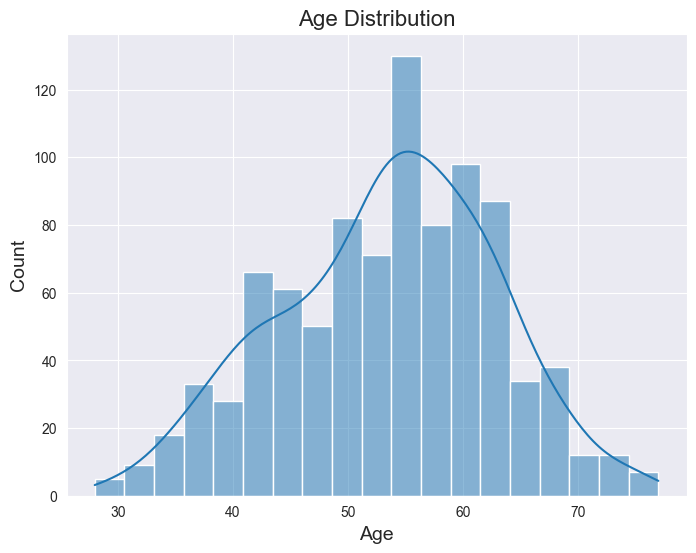

In [6]:
plt.figure(figsize=(8, 6))
sns.histplot(data['Age'], kde=True)
plt.title('Age Distribution', fontsize=16)
plt.xlabel('Age', fontsize=14)
plt.ylabel('Count', fontsize=14)
plt.show()

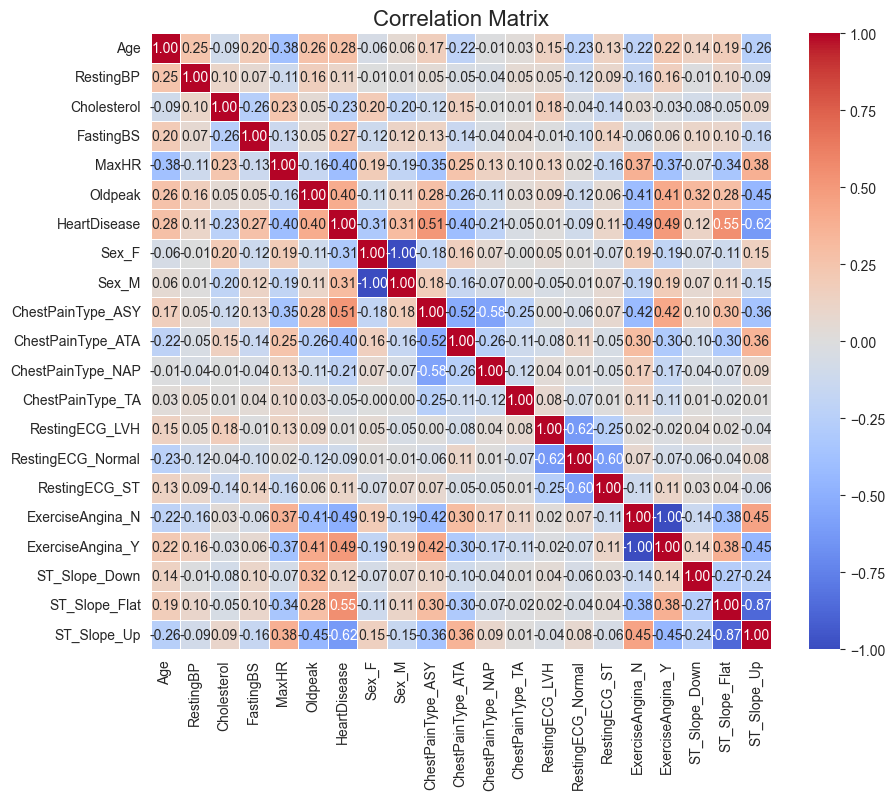

In [7]:
correlation_matrix = data_encoded.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Correlation Matrix', fontsize=16)
plt.show()

Random Forrest Model

In [8]:
random_forest_model = RandomForestClassifier(n_estimators=100, random_state=42)
random_forest_model.fit(X_train, y_train)

y_pred = random_forest_model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy*100)

report = classification_report(y_test, y_pred, output_dict=True)
    
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

Accuracy: 89.1891891891892

Classification Report:
              precision    recall  f1-score   support

           0       0.83      0.90      0.87        72
           1       0.93      0.88      0.91       113

    accuracy                           0.89       185
   macro avg       0.88      0.89      0.89       185
weighted avg       0.90      0.89      0.89       185


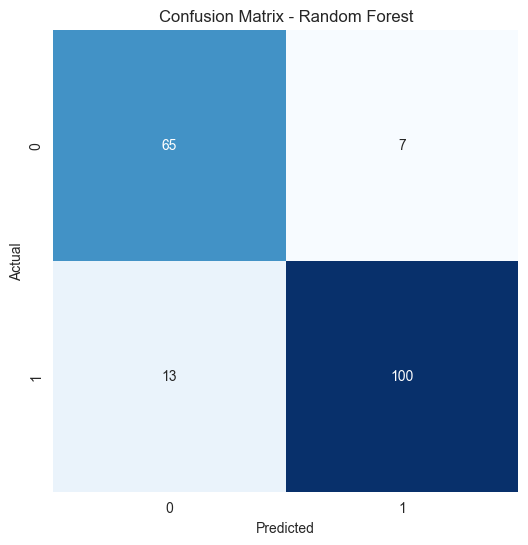

In [9]:
def plot_confusion_matrix(y_true, y_pred, model_name):
    cm = confusion_matrix(y_true, y_pred)
    plt.figure(figsize=(6, 6))
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", cbar=False)
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.title(f'Confusion Matrix - {model_name}')
    plt.show()

plot_confusion_matrix(y_test, y_pred, 'Random Forest')

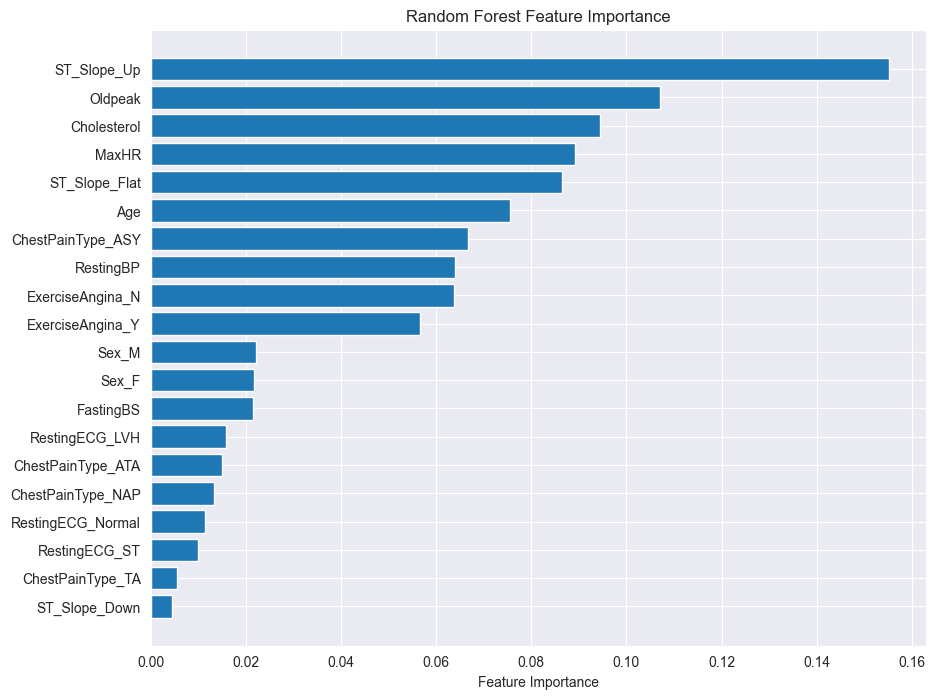

In [10]:
feature_importance = random_forest_model.feature_importances_

feature_names = X.columns

sorted_idx = feature_importance.argsort()

plt.figure(figsize=(10, 8))
plt.barh(range(len(sorted_idx)), feature_importance[sorted_idx], align='center')
plt.yticks(range(len(sorted_idx)), [feature_names[i] for i in sorted_idx])
plt.xlabel('Feature Importance')
plt.title('Random Forest Feature Importance')
plt.show()

KNN Model

In [11]:
knn_model = KNeighborsClassifier(n_neighbors=5)  
knn_model.fit(X_train, y_train)

y_pred_knn = knn_model.predict(X_test)

accuracy_knn = accuracy_score(y_test, y_pred_knn)
print("KNN Model Accuracy:", accuracy_knn*100)

print("\nClassification Report for KNN Model:")
print(classification_report(y_test, y_pred_knn))


KNN Model Accuracy: 69.72972972972973

Classification Report for KNN Model:
              precision    recall  f1-score   support

           0       0.60      0.65      0.63        72
           1       0.77      0.73      0.75       113

    accuracy                           0.70       185
   macro avg       0.68      0.69      0.69       185
weighted avg       0.70      0.70      0.70       185


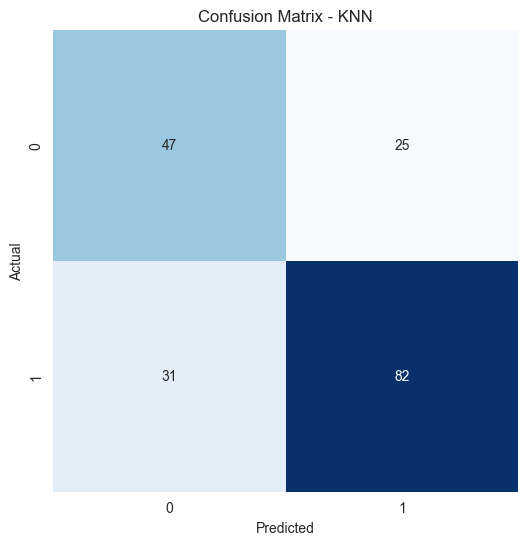

In [12]:
plot_confusion_matrix(y_test, y_pred_knn, 'KNN')

In [13]:
logistic_regression_model = LogisticRegression(solver='lbfgs', max_iter=1000)

logistic_regression_model.fit(X_train, y_train)
y_pred_logistic = logistic_regression_model.predict(X_test)

accuracy_logistic = accuracy_score(y_test, y_pred_logistic)
print("Logistic Regression Model Accuracy:", accuracy_logistic)

print("\nClassification Report for Logistic Regression Model:")
print(classification_report(y_test, y_pred_logistic))

Logistic Regression Model Accuracy: 0.8810810810810811

Classification Report for Logistic Regression Model:
              precision    recall  f1-score   support

           0       0.81      0.90      0.86        72
           1       0.93      0.87      0.90       113

    accuracy                           0.88       185
   macro avg       0.87      0.89      0.88       185
weighted avg       0.89      0.88      0.88       185


D:\Users\devch\Documents\SML_PROJECT\.venv\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


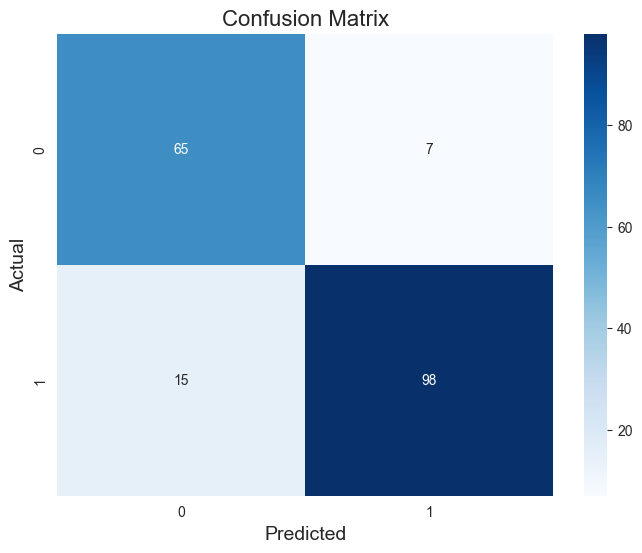

In [14]:
conf_matrix = confusion_matrix(y_test, y_pred_logistic)

# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix', fontsize=16)
plt.xlabel('Predicted', fontsize=14)
plt.ylabel('Actual', fontsize=14)
plt.show()

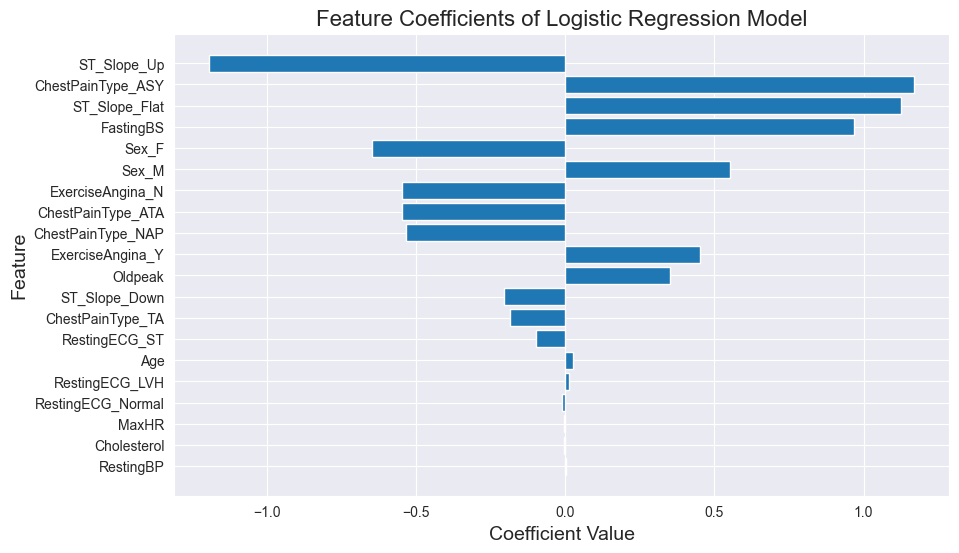

In [15]:
coefficients = logistic_regression_model.coef_[0]
feature_names = X_train.columns

# Sort coefficients by their absolute values
sorted_indices = np.argsort(np.abs(coefficients))
sorted_coefficients = coefficients[sorted_indices]
sorted_feature_names = feature_names[sorted_indices]

# Plot feature coefficients
plt.figure(figsize=(10, 6))
plt.barh(sorted_feature_names, sorted_coefficients)
plt.title('Feature Coefficients of Logistic Regression Model', fontsize=16)
plt.xlabel('Coefficient Value', fontsize=14)
plt.ylabel('Feature', fontsize=14)
plt.show()

In [16]:
one_hot_features = pd.get_dummies(data[['Sex', 'ChestPainType', 'RestingECG', 'ExerciseAngina', 'ST_Slope']], 
                                  columns=['Sex', 'ChestPainType', 'RestingECG', 'ExerciseAngina', 'ST_Slope']).columns

def predict_and_update_csv(input_data):
    input_df = pd.DataFrame([input_data], columns=data.columns[:-1])
    # Encode categorical variables
    input_df = pd.get_dummies(input_df, columns=['Sex', 'ChestPainType', 'RestingECG', 'ExerciseAngina', 'ST_Slope'])
    for feature in one_hot_features:
        if feature not in input_df.columns:
            input_df[feature] = 0

    input_df = input_df[X_train.columns]
    prediction = random_forest_model.predict(input_df)[0]
    if (prediction == 1):
        print("You have high chances of having heart disease please consult yout cardiologist soon !")
    else:
        print("You are healthy and safe !")
    input_data['HeartDisease'] = prediction
    data_with_input = pd.concat([data, pd.DataFrame([input_data])], ignore_index=True)
    data_with_input.to_csv('dataset/heart.csv', index=False)

def user_interface():
    while True:
        input_data = {}
        input_data['Age'] = int(input("Enter Age: "))
        input_data['Sex'] = input("Enter Sex (M/F): ")
        input_data['ChestPainType'] = input("Enter Chest Pain Type (ASY/ATA/NAP/TA): ")
        input_data['RestingBP'] = float(input("Enter Resting Blood Pressure: "))
        input_data['Cholesterol'] = float(input("Enter Cholesterol Level: "))
        input_data['FastingBS'] = int(input("Enter Fasting Blood Sugar (1/0): "))
        input_data['RestingECG'] = input("Enter Resting ECG (Normal/LVH/ST): ")
        input_data['MaxHR'] = float(input("Enter Maximum Heart Rate Achieved: "))
        input_data['ExerciseAngina'] = input("Enter Exercise Induced Angina (Y/N): ")
        input_data['Oldpeak'] = float(input("Enter Oldpeak: "))
        input_data['ST_Slope'] = input("Enter ST Slope (Flat/Down/Up): ")

        predict_and_update_csv(input_data)

        print("Prediction and data update successful!")
        choice = input("Do you want to enter more data? (yes/no): ")
        if choice.lower() != 'yes':
            break

if __name__ == "__main__":
    user_interface()


ValueError: invalid literal for int() with base 10: ''